<a href="https://colab.research.google.com/github/Sharkizo1st/Linear-Regression-Model-for-House-Price-Prediction/blob/master/Crisp_DM_Linear_Regression_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crisp DM Method

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

###import Data From Kaggle

In [37]:
from google.colab import files
files.upload();

Saving kaggle.json to kaggle (1).json


In [38]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [39]:
!kaggle datasets download -d andonians/random-linear-regression

random-linear-regression.zip: Skipping, found more recently modified local copy (use --force to force download)


In [40]:
! unzip random-linear-regression.zip

Archive:  random-linear-regression.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: test.csv                
  inflating: train.csv               


###Read Data by Pandas

In [41]:
df = pd.read_csv('train.csv')

In [42]:
df.head()


,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [44]:
df.isnull().sum()

x    0
y    1
dtype: int64

In [45]:
df.columns

Index(['x', 'y'], dtype='object')

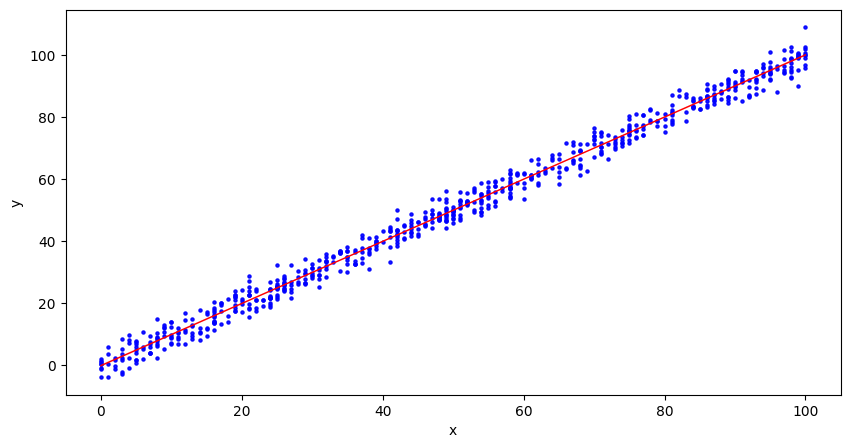

In [46]:
sns.regplot(data=df, x="x", y="y",
           scatter_kws = {'color': 'Blue', 's' : 5, 'alpha':0.9, },
            line_kws = {'color': 'red', 'linewidth': 1, 'alpha':1});

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np


In [48]:
# Handling missing values if any
df['y'].fillna(df['y'].mean(), inplace=True)

###Contruc Data

In [49]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['x']], df['y'], test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

# Intergater Data

In [50]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

# Get the coefficients and intercept of the model
coefficients = model.coef_[0]
intercept = model.intercept_

print(f'Coefficients: {coefficients:.2f}')
print(f'Intercept: {intercept:.2f}')

Mean Squared Error: 893.73
Root Mean Squared Error: 29.90
Coefficients: 0.04
Intercept: 48.75
